<a href="https://colab.research.google.com/github/penguinshunya/ml/blob/main/mnist%E3%81%AENN%E3%82%92%E4%BD%9C%E6%88%90%E3%81%97%E3%80%81%E3%83%95%E3%82%A3%E3%83%AB%E3%82%BF%E3%82%92%E5%8F%AF%E8%A6%96%E5%8C%96%E3%81%99%E3%82%8B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [33]:
inputs = tf.keras.layers.Input((28, 28, 1))
x = tf.keras.layers.Conv2D(8, 5, activation="selu")(inputs)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dropout(0.5)(x)
outputs = tf.keras.layers.Dense(10, activation="softmax", kernel_regularizer=tf.keras.regularizers.L2(0.001))(x)
model = tf.keras.Model(inputs, outputs)
model.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_7 (Conv2D)           (None, 24, 24, 8)         208       
                                                                 
 flatten_7 (Flatten)         (None, 4608)              0         
                                                                 
 dropout_1 (Dropout)         (None, 4608)              0         
                                                                 
 dense_6 (Dense)             (None, 10)                46090     
                                                                 
Total params: 46,298
Trainable params: 46,298
Non-trainable params: 0
_________________________________________________________________


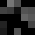

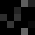

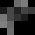

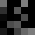

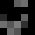

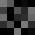

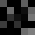

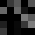

In [34]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

weights = tf.transpose(model.layers[1].weights[0], (3, 0, 1, 2)).numpy()

min = weights.flatten().min()
weights -= min
max = weights.flatten().max()
weights = weights / max

for i in range(8):
  row = weights[i]
  row = row.reshape((5, 5))
  row = cv2.resize(row, (35, 35), interpolation=cv2.INTER_NEAREST)
  row = (row * 255).astype(np.int8)
  cv2_imshow(row)
  print()

In [26]:
x_train = x_train.reshape((-1, 28, 28, 1))
x_test = x_test.reshape((-1, 28, 28, 1))
x_train.shape, x_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [35]:
model.compile(loss=tf.keras.losses.sparse_categorical_crossentropy, optimizer="adam", metrics=["accuracy"])
model.fit(x_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 1.7824 - accuracy: 0.8915
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3742 - accuracy: 0.9416
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4194 - accuracy: 0.9460
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4842 - accuracy: 0.9487
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5380 - accuracy: 0.9519
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5694 - accuracy: 0.9530
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5805 - accuracy: 0.9567
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6168 - accuracy: 0.9567
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6184 - accuracy: 0.9574
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.629

In [28]:
model.layers[1].weights[0].shape

TensorShape([5, 5, 1, 8])

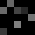

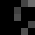

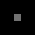

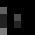

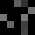

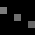

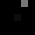

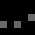

In [36]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

weights = tf.transpose(model.layers[1].weights[0], (3, 0, 1, 2)).numpy()

min = weights.flatten().min()
weights -= min
max = weights.flatten().max()
weights = weights / max

for i in range(8):
  row = weights[i]
  row = row.reshape((5, 5))
  row = cv2.resize(row, (35, 35), interpolation=cv2.INTER_NEAREST)
  row = (row * 255).astype(np.int8)
  cv2_imshow(row)
  print()